In [7]:
import numpy as np
from scipy.stats import norm, multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
%matplotlib inline

In [8]:
plt.style.use('ggplot')
np.random.seed(123)

In [9]:
# 2変量正規分布のパラメータ
mu = np.array([1, 2])
cov = np.array([[1.0, 0.7], [0.7, 1.0]])

In [10]:
x = np.arange(-2, 4, 0.01)
y = np.arange(-1, 5, 0.01)
X, Y = np.meshgrid(x, y) # 格子座標を作成， それぞれ全座標のX軸，Y軸の値が入る
pos = np.zeros([X.shape[0], X.shape[1], 2]) # XもYも同じ形
pos[:, :, 0] = X # 0チャンネルにXの座標を代入
pos[:, :, 1] = Y # 1チャンネルにYの座標を代入

Text(0, 0.5, '$x_{2}$')

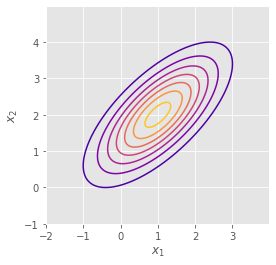

In [12]:
# 多変量正規分布，pdfにx, yの値を入れるとzを返す
rv = multivariate_normal(mu, cov)

# 2変量正規分布の等高線を描く
plt.figure(figsize=(4,4))
plt.contour(X, Y, rv.pdf(pos), cmap="plasma")
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")

In [16]:
NMCS = 500

# 定数を宣言
sigma12 = cov[1,0]
sigma1 = cov[0,0] ** 0.5
sigma2 = cov[1,1] ** 0.5
rho = sigma12 / (sigma1 * sigma2)

# 初期値を決定
z1 = 0.0
z2 = 0.0

# 遷移記録の初期化
z1_mcs = [z1]
z2_mcs = [z2]

# サンプリングを実行
for i in range(NMCS):
    # f(z1|z2)
    z1 = norm.rvs(loc=rho*z2, scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)
    
    # f(z2|z1)
    z2 = norm.rvs(loc=rho*z1, scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)

df1 = pd.DataFrame(mu[0] + np.array(z1_mcs) * sigma1)
df2 = pd.DataFrame(mu[1] + np.array(z2_mcs) * sigma2)

In [17]:
df1.head()

,0
0,1.000000
1,0.465230
2,0.465230
3,1.534565
4,1.534565


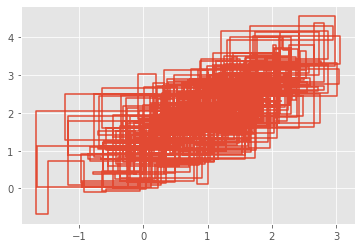

In [18]:
plt.plot(df1[0], df2[0])

In [19]:
@interact(mcs=(0, 100, 1))
def animation(mcs=0):
    plt.contour(X, Y, rv.pdf(pos), cmap="plasma")
    plt.xlim((-3.0, 4.5))
    plt.xlim((-3.0, 5.0))
    plt.plot(df1[0][:mcs], df2[0][:mcs])
    plt.show()

interactive(children=(IntSlider(value=0, description='mcs'), Output()), _dom_classes=('widget-interact',))